In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.utils import to_categorical
from keras.backend import clear_session
from keras.layers import Dense
from keras.preprocessing.text import one_hot
import os


In [138]:
### FUNCTIONS ##########################################

def get_boolean(i, targets, p):
    
    boolean = np.zeros(len(targets))
    
    for y in range(len(targets)):
        if(targets[y][i] == p): boolean[y] = 0
        else: boolean[y] = 1
        
    return boolean

def visualize(epochs, history):
    
    #Visualize epoch V J
    epoch=np.linspace(1,epochs,num=epochs)

    print("epoch vs J ->")
    fig, axes = plt.subplots()
    axes.plot(epoch, history)
    axes.set_xlabel('epoch')
    axes.set_ylabel('J')
    plt.show()
    
def format_split_data(file, targets):
    
    #split into train/test - 70/30% - shuffles data prior to split
    train, test, y_train, y_test = train_test_split(file, targets, train_size=0.7, test_size=0.3, random_state=1000)
    print("Train x / y: ", train.shape, y_train.shape)
    print("Test x / y: ", test.shape, y_test.shape)

    #convert to one-hot target encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return train, test, y_train, y_test

def build_model(size):
        
    # Sequential groups linear stack of layers into a model
    model = Sequential()
    # First layer receives num features as input shape
    model.add(Dense(8, input_dim=size, activation='relu'))
    # output layer must output num classes (16)
    model.add(Dense(2, activation='softmax'))
    # to config the model w losses and metrics
    model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy())
    # This builds the model for the first time / trains
    model.summary()
    
    return model

def build_model_deep(size):
        
    # Sequential groups linear stack of layers into a model
    model = Sequential()
    # First layer receives num features as input shape
    model.add(Dense(16, input_dim=size, activation='relu'))
    # output layer must output num classes (16)
    model.add(Dense(8, input_dim=size, activation='relu'))
    # output layer must output num classes (16)
    model.add(Dense(4, input_dim=size, activation='relu'))
    # output layer must output num classes (16)
    model.add(Dense(2, activation='softmax'))
    # to config the model w losses and metrics
    model.compile(optimizer='sgd', loss=tf.keras.losses.CategoricalCrossentropy())
    # This builds the model for the first time / trains
    model.summary()
    
    return model

def fit_model(x, y, e):
    
    history = model.fit(train, y_train, epochs=e, verbose=0)
    h = np.array(history.history['loss']) # history of loss @ ea epoch -> np array
    
    visualize(e, h) #chart J v epoch
    
    return h

def predict(test, y):
    #Generate class predictions & accuracy for the input samples
    yhat = model.predict(test, verbose=1)
    m = tf.keras.metrics.CategoricalAccuracy()
    m.update_state(y, yhat, sample_weight=None)
    
    return m.result().numpy()
    

In [125]:
### GET / FORMAT TARGET DATA ##########################################

# small set = 1000features / large set = 500features
posts_smallSet = np.array(pd.read_csv('vectorized_posts3', header=None))
posts_largeSet = np.array(pd.read_csv('vectorizedPosts_largeSet', header=None))

# get targets
df = pd.read_csv('mbti_1.csv', names=['type', 'posts'])
targets = np.array(df['type'].values[1:])

# split targets into 4 separate integer binary classifications
# one for each category 
ie = get_boolean(0, targets, targets[0][0])
ns = get_boolean(1, targets, targets[0][1])
ft = get_boolean(2, targets, targets[0][2])
pj = get_boolean(3, targets, targets[0][3])

print("Small Set: ",np.shape(posts_smallSet))
print("Large Set: ",np.shape(posts_largeSet))


Small Set:  (8675, 500)
Large Set:  (8675, 1000)


Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 4008      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


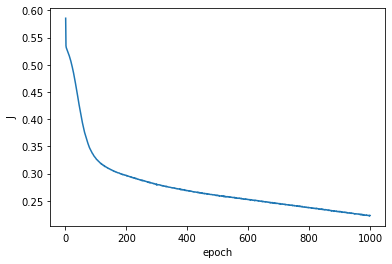

82/82 [==============================] - 0s 615us/step
Accuracy I-vs-E 84.86%: epochs 1000 - features 500
Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


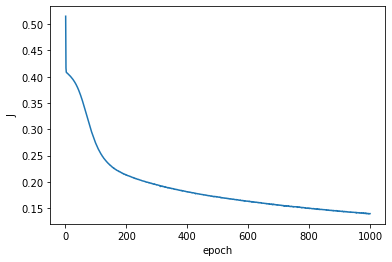

82/82 [==============================] - 0s 432us/step
Accuracy N-vs-S 89.32%: epochs 1000 - features 500
Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


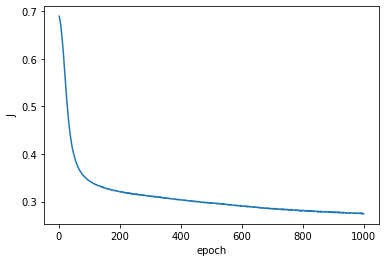

82/82 [==============================] - 0s 496us/step
Accuracy F-vs-T 83.98%: epochs 1000 - features 500
Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


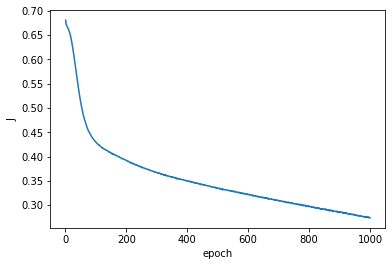

82/82 [==============================] - 0s 424us/step
Accuracy P-vs-J 77.95%: epochs 1000 - features 500


In [134]:
### SMALL SET - 500 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

# I-vs-E
train, test, y_train, y_test = format_split_data(posts_smallSet, ie)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy I-vs-E {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session() 

# N-vs-S
train, test, y_train, y_test = format_split_data(posts_smallSet, ns)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy N-vs-S {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# F-vs-T
train, test, y_train, y_test = format_split_data(posts_smallSet, ft)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy F-vs-T {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# P-vs-J
train, test, y_train, y_test = format_split_data(posts_smallSet, pj)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy P-vs-J {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


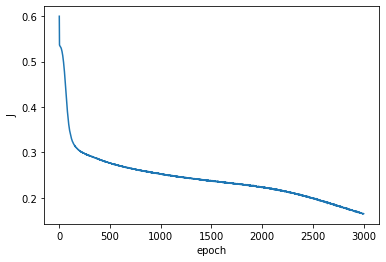

82/82 [==============================] - 0s 446us/step
Accuracy I-vs-E 83.40%: epochs 3000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


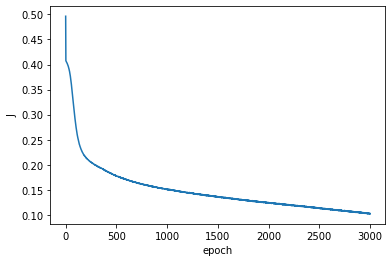

82/82 [==============================] - 0s 468us/step
Accuracy N-vs-S 88.32%: epochs 3000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


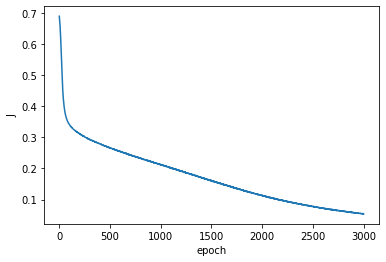

82/82 [==============================] - 0s 480us/step
Accuracy F-vs-T 80.79%: epochs 3000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


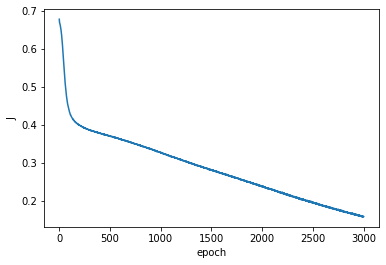

82/82 [==============================] - 0s 461us/step
Accuracy P-vs-J 75.61%: epochs 3000 - features 500



In [135]:
### SMALL SET - 500 FEATURES - 3000 EPOCHS ##########################################
epochs = 3000

# I-vs-E
train, test, y_train, y_test = format_split_data(posts_smallSet, ie)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy I-vs-E {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session() 

# N-vs-S
train, test, y_train, y_test = format_split_data(posts_smallSet, ns)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy N-vs-S {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# F-vs-T
train, test, y_train, y_test = format_split_data(posts_smallSet, ft)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy F-vs-T {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# P-vs-J
train, test, y_train, y_test = format_split_data(posts_smallSet, pj)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy P-vs-J {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 8008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 8,026
Trainable params: 8,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


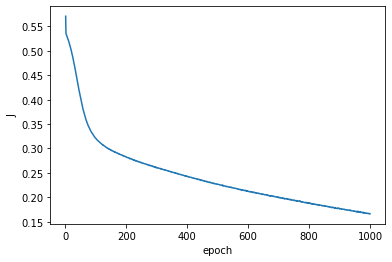

82/82 [==============================] - 0s 506us/step
Accuracy I-vs-E 84.25%: epochs 1000 - features 1000

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


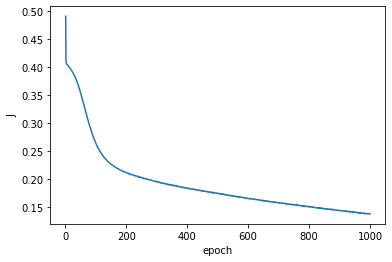

82/82 [==============================] - 0s 518us/step
Accuracy N-vs-S 89.47%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


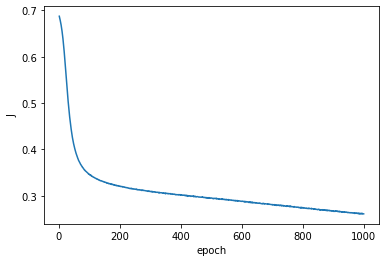

82/82 [==============================] - 0s 465us/step
Accuracy F-vs-T 84.33%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


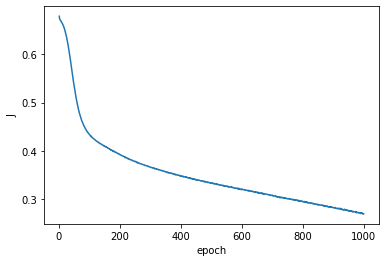

82/82 [==============================] - 0s 406us/step
Accuracy P-vs-J 79.14%: epochs 1000 - features 500



In [136]:
### LARGE SET - 1000 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

# I-vs-E
train, test, y_train, y_test = format_split_data(posts_largeSet, ie)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy I-vs-E {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session() 

# N-vs-S
train, test, y_train, y_test = format_split_data(posts_smallSet, ns)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy N-vs-S {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# F-vs-T
train, test, y_train, y_test = format_split_data(posts_smallSet, ft)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy F-vs-T {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# P-vs-J
train, test, y_train, y_test = format_split_data(posts_smallSet, pj)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy P-vs-J {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 8008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 8,026
Trainable params: 8,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


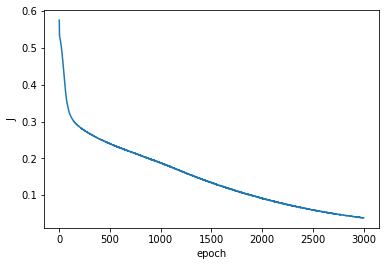

82/82 [==============================] - 0s 468us/step
Accuracy I-vs-E 80.52%: epochs 3000 - features 1000

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


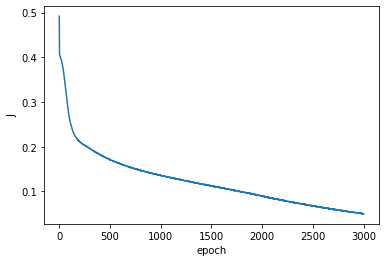

82/82 [==============================] - 0s 462us/step
Accuracy N-vs-S 88.17%: epochs 3000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


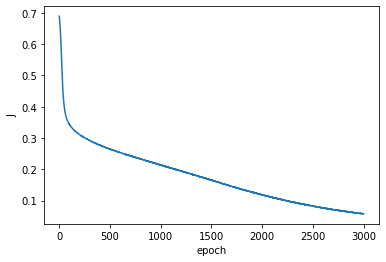

82/82 [==============================] - 0s 446us/step
Accuracy F-vs-T 81.56%: epochs 3000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


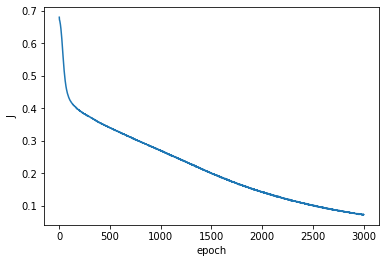

82/82 [==============================] - 0s 414us/step
Accuracy P-vs-J 76.64%: epochs 3000 - features 500



In [137]:
### LARGE SET - 1000 FEATURES - 3000 EPOCHS ##########################################
epochs = 3000

# I-vs-E
train, test, y_train, y_test = format_split_data(posts_largeSet, ie)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy I-vs-E {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session() 

# N-vs-S
train, test, y_train, y_test = format_split_data(posts_smallSet, ns)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy N-vs-S {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# F-vs-T
train, test, y_train, y_test = format_split_data(posts_smallSet, ft)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy F-vs-T {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# P-vs-J
train, test, y_train, y_test = format_split_data(posts_smallSet, pj)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy P-vs-J {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                8016      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 8,198
Trainable params: 8,198
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


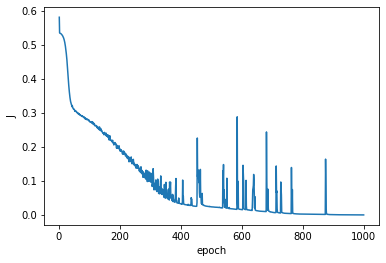

82/82 [==============================] - 0s 429us/step
Accuracy I-vs-E 81.25%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


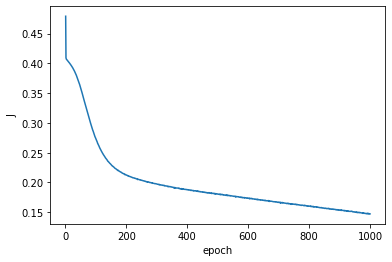

82/82 [==============================] - 0s 404us/step
Accuracy N-vs-S 89.28%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


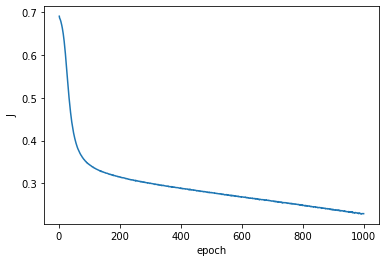

82/82 [==============================] - 0s 404us/step
Accuracy F-vs-T 83.86%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


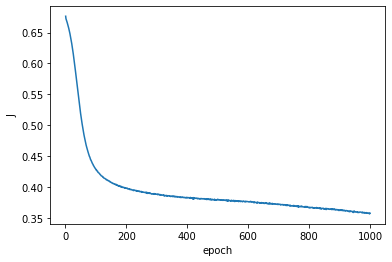

82/82 [==============================] - 0s 418us/step
Accuracy P-vs-J 78.33%: epochs 1000 - features 500



In [139]:
### DEEP NETWORK - SMALL SET - 500 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

# I-vs-E
train, test, y_train, y_test = format_split_data(posts_smallSet, ie)
model = build_model_deep(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy I-vs-E {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session() 

# N-vs-S
train, test, y_train, y_test = format_split_data(posts_smallSet, ns)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy N-vs-S {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# F-vs-T
train, test, y_train, y_test = format_split_data(posts_smallSet, ft)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy F-vs-T {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# P-vs-J
train, test, y_train, y_test = format_split_data(posts_smallSet, pj)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy P-vs-J {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 16,198
Trainable params: 16,198
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


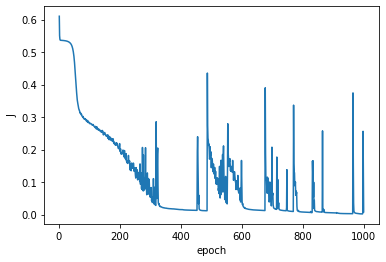

82/82 [==============================] - 0s 456us/step
Accuracy I-vs-E 80.95%: epochs 1000 - features 1000

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


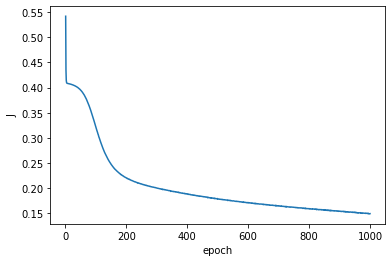

82/82 [==============================] - 0s 406us/step
Accuracy N-vs-S 89.17%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


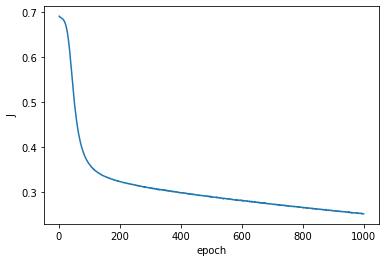

82/82 [==============================] - 0s 529us/step
Accuracy F-vs-T 84.13%: epochs 1000 - features 500

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


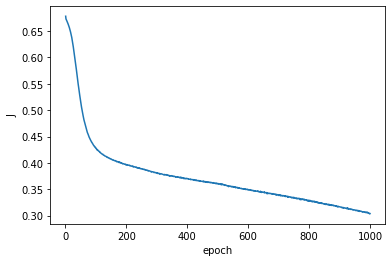

82/82 [==============================] - 0s 395us/step
Accuracy P-vs-J 78.72%: epochs 1000 - features 500



In [140]:
### LARGE SET - 1000 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

# I-vs-E
train, test, y_train, y_test = format_split_data(posts_largeSet, ie)
model = build_model_deep(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy I-vs-E {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session() 

# N-vs-S
train, test, y_train, y_test = format_split_data(posts_smallSet, ns)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy N-vs-S {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# F-vs-T
train, test, y_train, y_test = format_split_data(posts_smallSet, ft)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy F-vs-T {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()

# P-vs-J
train, test, y_train, y_test = format_split_data(posts_smallSet, pj)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy P-vs-J {:.2%}: epochs {} - features {}\n".format(result, epochs, train.shape[1]))
clear_session()